# Pyramids and Wavelets

The <a href="https://en.wikipedia.org/wiki/Pyramid_(image_processing)">Laplacian pyramid</a> and the [Discrete Wavelet Transform](https://en.wikipedia.org/wiki/Discrete_wavelet_transform) are two closed numerical transforms that can be used to obtain a multiresolution representation of a image.

## Gaussian Scale Space (Gaussian pyramid)

The $N$-levels Gaussian pyramid of a image $I$ is defined as

\begin{equation}
  \left\{\begin{array}{rcl}
    L^0 & = & I \\
    L^{n+1} & = & \text{REDUCE}(L^n);~n\in\{0,1,\cdots,N-1\}
  \end{array}\right.
\end{equation}

where the $\text{REDUCE}(s)$ operator is carried out by [convolving](http://my.ece.msstate.edu/faculty/fowler/Classes/ECE3443/Handouts/dt_convolution.pdf) $I$ with a Gaussian kernel $w$ (the unit impulse response, also known as the transfer function, of the corresponding Gaussian low-pass filter). A Gaussian kernel is the evaluation of a Gaussian function at (for example, 5, in the 1-dimensional case) values centered at zero and, the Gaussian coefficients must satisfy that

\begin{equation}
  \sum_{m=-2}^2w(m)=1
\end{equation}

(the gain of the filter is $1$)

\begin{equation}
  w(i)=w(-i); i=0,1,2
\end{equation}

(the kernel is symmetric), and being $w[0]=a$, $w[-1]=w[1]=b$ and $w[-2]=w[2]=c$, it holds that

\begin{equation}
  a=2b-2c.
\end{equation}

Notice that in this case, $w=\{\frac{1}{16}, \frac{4}{16}, \frac{6}{16}, \frac{4}{16}, \frac{1}{16}\}$. This is the 1D kernel. The 2D version can be extended or the 1D can be applied by rows and then by columns, or viceversa.

As it will be seen in the demo (see below), the Gaussian scale space exhibits several interesting properties:

1. *Spatial homogeneity*: all locations in the image are filtered with the same gain.
2. *Spatial isotropy*: all the structures are treated with homogeneity independently of their orientation.
3. *Spatial scale invariace*: the gain of the filtering is independent of the size of the objects of the image.
4. *Linearity*: the filtering is carried out with a convolution, which is a linear operator.

The last stage of the $\text{REDUCE}(\cdot)$ operator is the decimation (the even or the odd samples are removed) of the filtered image. This is a lossless stage (without aliasing) only in the case the half of the high-frequency components of $L^n$ are not available in $L^{n+1}$. Notice that, as a consequence of the decimation, the overall energy of $L^{n+1}$ will be, on average, 1/4 of the energy of $L^n$.

### Gaussian pyramid of *lena*

\# Import the [urllib.request — extensible library for opening URLs](https://docs.python.org/3.0/library/urllib.request.html) module, the [urllib](https://docs.python.org/3/library/urllib.html) package is included in the standard library.

In [1]:
import urllib.request

\# Import [Python bindings](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_setup/py_intro/py_intro.html) for [OpenCV](http://docs.opencv.org/3.0-beta/index.html), a computer vision library. Install the package with "`sudo pip3 install opencv-python`". Recomended reading [OpenCV-Python Tutorials](http://docs.opencv.org/trunk/d6/d00/tutorial_py_root.html).

In [2]:
import cv2

\# Import [NumPy](http://www.numpy.org), an efficient array manipulation library. Install with "`pip3 install numpy`".

In [3]:
import numpy as np

\# Import the [pyplot API](http://matplotlib.org/api/pyplot_api.html) module from [matplotlib](http://matplotlib.org/index.html) package, a library for 2D plotting. This will allow us to plot data, interactively. Install with "`sudo pip3 install matplotlib`".

In [4]:
from matplotlib import pyplot as plt

\# [Configure matplotlib](http://ipython.readthedocs.io/en/stable/interactive/plotting.html) for plotting inside Jupyter Notebook (not in external windows).

In [5]:
%matplotlib inline

\# Request the [lena image](https://en.wikipedia.org/wiki/Lenna). This function returns a file-like object.

In [6]:
HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/lena.png')

\# [Read](https://docs.python.org/3/tutorial/inputoutput.html) the complete "file" `HTTP_response` as a <a href="https://docs.python.org/3/library/functions.html#bytes">bytes object</a>. This (<a href="https://en.wikibooks.org/wiki/Python_Programming/Data_Types#Mutable_vs_Immutable_Objects">inmutable</a>) object  is transformed in a (<a href="https://en.wikibooks.org/wiki/Python_Programming/Data_Types#Mutable_vs_Immutable_Objects">mutable</a>) <a href="https://docs.python.org/3/library/functions.html#bytearray">bytearray object</a>, as the NumPy's [asarray](https://docs.scipy.org/doc/numpy/reference/generated/numpy.asarray.html) (function) converter, requires. The final result is an [array](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html) object containing unsigned integers of 8 bits.

In [7]:
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)

\# [Decompress](http://docs.opencv.org/3.0-beta/modules/imgcodecs/doc/reading_and_writing_images.html) the content of the input array. Returns an [image object](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_image_display/py_image_display.html).

In [8]:
BGR = cv2.imdecode(arr,-1)

\# Convert the image to the YCrCb [color space](http://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#cvtcolor).

In [9]:
Y = cv2.cvtColor(BGR, cv2.COLOR_BGR2YCrCb)[:,:,0]
#tmp = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
#I = tmp

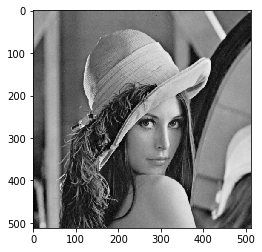

In [10]:
plt.imshow(Y, cmap="gray")

\# Compute the pyramid. We use a <a href="https://docs.python.org/3/library/stdtypes.html#sequence-types-list-tuple-range">list</a> for storing the levels of the pyramid.

In [11]:
N = 5 # Number of levels of the pyhramid
L = [Y] # L^0 (the base of the pyramid)

\# OpenCV's <a href="http://docs.opencv.org/3.1.0/d4/d86/group__imgproc__filter.html#gaf9bba239dfca11654cb7f50f889fc2ff">pyrDown</a> low-pass filter and decimate an image. Extra info [here](http://docs.opencv.org/master/dc/dff/tutorial_py_pyramids.html).

In [12]:
for n in range(N-1):
    print(n, len(L), len(L[n]))
    L.append(cv2.pyrDown(L[n]))

0 1 512
1 2 256
2 3 128
3 4 64


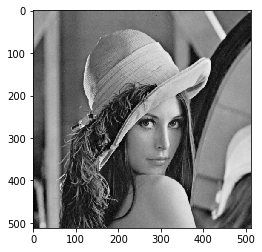

In [13]:
plt.imshow(L[0], cmap="gray")

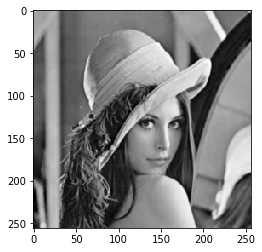

In [14]:
plt.imshow(L[1], cmap="gray")

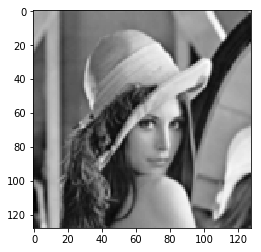

In [15]:
plt.imshow(L[2], cmap="gray")

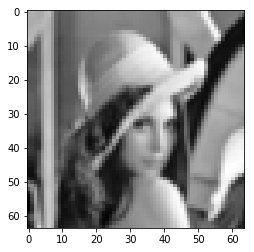

In [16]:
plt.imshow(L[3], cmap="gray")

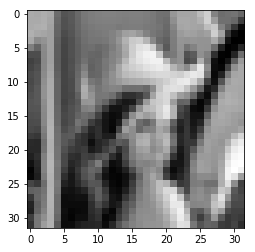

In [17]:
plt.imshow(L[4], cmap="gray")

## Laplacian pyramid (Laplacian Pyramid Transform) (LPT)

### Forward transform

In the Gaussian pyramid, the image $L^{N-1}$ (the top level) may serve as a prediction for the image (next below level) $L^{N−2}$, and if this prediction (the interpolation of $L^{N-1}$) is substracted to $L^{N-2}$, the resulting error signal $H^{N-2}$ can have a lower entropy than the original $L^{N-2}$. This process can be applied to the complete Gaussian pyramid, level by level, obtaining a Laplacian pyramid by means of:

\begin{equation}
  \left\{\begin{array}{rcl}
    H^{N-1} & = & L^{N-1} \text{ /* the top level of the Gaussian pyramid */}\\
    H^n     & = & L^n - \text{EXPAND}(L^{n+1});~n\in\{N-2,N-3,\cdots,0\}
\end{array}\right.
\end{equation}

The EXPAND operator performs bidimensional a 1/2-subpixel interpolation.

### LPT of Lena

In [18]:
H = [L[N-1]]
for n in range(N-1):
    interpolation = cv2.pyrUp(L[N-n-1])
    difference = L[N-n-2] - interpolation + 128
    H.append(difference)
H.reverse()

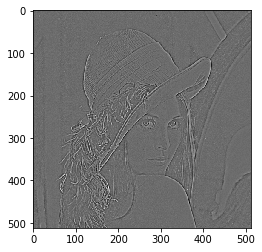

In [19]:
plt.imshow(H[0], cmap="gray") # Base of the pyramid

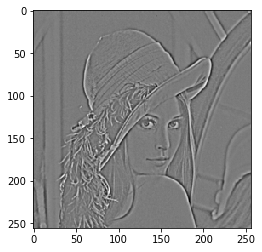

In [20]:
plt.imshow(H[1], cmap="gray")

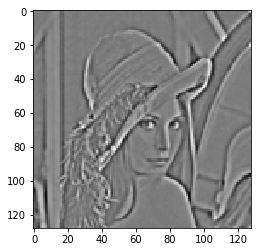

In [21]:
plt.imshow(H[2], cmap="gray")

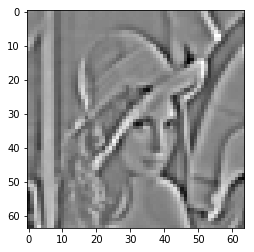

In [22]:
plt.imshow(H[3], cmap="gray")

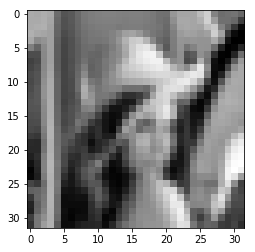

In [23]:
plt.imshow(H[4], cmap="gray")

\# Compute (and plot) the histograms of the pyramid using [`cv2.calcHist()`](http://docs.opencv.org/3.1.0/d1/db7/tutorial_py_histogram_begins.html).

0
1
2
3


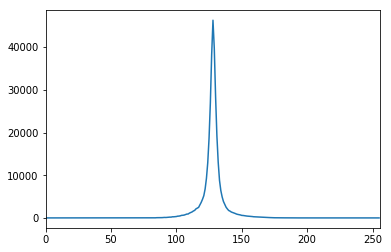

In [24]:
sum_hist = np.zeros([256,1], np.float64)
for n in range(N-1):
    print(n)
    hist = cv2.calcHist([H[n]], [0], None, [256], [0, 256])
    sum_hist += hist
plt.plot(sum_hist)
plt.xlim([0,256])
plt.show()

\# Count the number of elements in each component of the pyramid.

In [25]:
n_pels = 0
for n in range(N):
    n_pels += ((Y.shape[0]+1) >> n) * ((Y.shape[1]+1) >> n)

In [26]:
print("Number of elements in the original image =", Y.shape[0]*Y.shape[1])

Number of elements in the original image = 262144


In [27]:
print("Number or elements in (a component of) the pyramid =", n_pels, "(",100.*(n_pels/(1.*Y.shape[0]*Y.shape[1])-1),"% of increment)")

Number or elements in (a component of) the pyramid = 350209 ( 33.59413146972656 % of increment)


\# Install [`scipy`](https://www.scipy.org) with `pip3 install scipy` to use "[`scipy.stats.entropy`](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.stats.entropy.html)".

In [28]:
import scipy.stats as st

In [29]:
entropy = st.entropy(sum_hist)[0]
print("Entropy of the pyramid =", entropy)

Entropy of the pyramid = 3.1872806072508206


## Lab (To-Do)

Compute the entropy of the original lena image.

### Inverse transform

The original image $I$ can be recovered from $\{H^n; n=N-1,\cdots,0\}$, the Laplacian pyramid, using the procedure:

\begin{equation}
  \left\{\begin{array}{rcl}
    I & = & H^{N-1} \\
    I & = & \text{EXPAND}(I) + H^n;~n\in\{N-2,N-3,\cdots,0\}
\end{array}\right.
\end{equation}

Notice that, basically, we have reconstructed (in-place) the whole Gaussian Pyramid.

### Inverse LPT of Lena

In [30]:
R = H[N-1]
for n in range(N-1):
    R = cv2.pyrUp(R)
    R = R + H[N-n-2] - 128

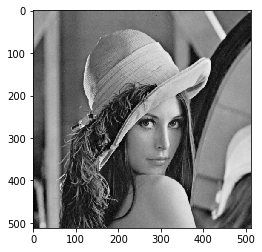

In [31]:
plt.imshow(R, cmap="gray")

In [32]:
# Check if the reconstruction is lossless
print((R == Y).all())

True


## Discrete Wavelet Transform (DWT)

### Forward transform

The [DWT](https://en.wikipedia.org/wiki/Discrete_wavelet_transform) can be computed using two different techniques. The first one is through a cascade of quadrature mirror filters banks, also known as PRFBs (Perfect Reconstruction Filter Banks). The second one, using Lifting. The main differences between both alternatives are: 

1. Filter banks use decimation and therefore, half of output coefficients are discarded after their computation. This is rather inefficient.
2. Lifting provides a more general framework in which non-lineal transforms, for example, can de defined. This can be useful to create transforms suitable for representing non-linear systems such as motion compensation in video compression.

However, in order to create a comparison between pyramids and wavelets, we will work, first, with the PRFB option.

The one-step inverse DWT of a signal $s$ can be defined by:

\begin{equation}
  s = \uparrow^2(L)*{\cal L}^{-1} + \uparrow^2(H)*{\cal H}^{-1}
\end{equation}

where $L$ and $H$ are the low-pass subband and the high-pass subband, respectively, generated by the forward DWT, and ${\cal L}^{-1}$ and ${\cal H}^{-1}$ are the synthesis filters of the "inverse transform". The subbands are computed by convolving the signal $S$ as

\begin{equation}
  \begin{array}{rcl}
      L & = & \downarrow^2(s*{\cal L})\\
      H & = & \downarrow^2(s*{\cal H}),
  \end{array}
\end{equation}

where ${\cal L}$ and ${\cal H}$ are (the response to the unit impulse signal of) the analysis filters of the "forward transform". If we express these filters in the $Z$-domain, in the case of a PRFB [it holds that](https://www.google.es/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=0ahUKEwjTveDwhpfQAhUB1RoKHTSLAd8QFgglMAA&url=http%3A%2F%2Fwww.springer.com%2Fcda%2Fcontent%2Fdocument%2Fcda_downloaddocument%2F9781447149408-c2.pdf%3FSGWID%3D0-0-45-1376222-p174792774&usg=AFQjCNG-ItYeO23545Xq4BkLVkiF_rv79w&sig2=T3P171UkA28M-arguJGgdw)

\begin{equation}
  \begin{array}{rcl}
      {\cal L}^{-1}(z) & = & {\cal L}(-z)\\
      {\cal H}^{-1}(z) & = & -{\cal H}(-z).
  \end{array}
\end{equation}

In other words, in the case of the low-pass synthesis filter ${\cal L}^{-1}$, it is the same than ${\cal L}$, but the filter has been [modulated by the signal $(-1)^n; n\in\mathbb{N}$](http://fourier.eng.hmc.edu/e161/lectures/filterbank/node1.html), and in the case of the high-pass synthesis filter ${\cal H}^{-1}$, the coeffients of the filter also has the oposite sign. Because the frequency response of real-domain signals (and also the transfer function of the filters) are periodic in the Fourier domain, with period $\pi$ (the frequency of the signal $(-1)^n; n\in\mathbb{N}$), in the practice we can implement the PRFB considering that

\begin{equation}
  \begin{array}{rcl}
      {\cal L}^{-1}(z) & = & {\cal L}(z)\\
      {\cal H}^{-1}(z) & = & -{\cal H}(z).
  \end{array}
\end{equation}

This is the definition of the 1-level DWT. The $N$-levels DWT is computed by applying the 1-level DWT to the $L$ subband, recursively:

\begin{equation}
  \left\{\begin{array}{rcl}
    L^N & = & \downarrow^2(L^{N-1}*{\cal L}) \\
    H^N & = & \downarrow^2(L^{N-1}*{\cal H})
  \end{array}\right.
\end{equation}

By definition, $L^0=s$.

# (LPT - DWT) relationship

## DWT $\rightarrow$ LPT

Considering the previous equation, it can be easely deduced that the LPT is described by 

\begin{equation}
  \left\{\begin{array}{rcl}
    L^N & = & \downarrow^2(L^{N-1}*{\cal L}) \\
    H^N & = & L^{N-1}*{\cal H}.
  \end{array}\right.
\end{equation}

Therefore, it is possible to compute the LPT by means of the DWT if the coefficients are interpolated. In the case of a image, we have for the 1-level DWT the subbands:

```
+------+------+
|   L  |  LH  |
+------+------+
|  HL  |  HH  |
+------+------+
```

\# Install [PyWavelets](https://pywavelets.readthedocs.io/en/latest/) with "`sudo pip3 install pywavelets`".

In [33]:
import pywt

In [34]:
# Compute the DWT of each component
print (pywt.wavelist())
wavelet = 'db7'

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'haar', 'mexh', 'morl', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'shan', 'sym2', 'sym3

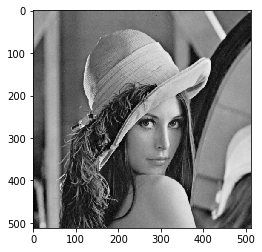

In [35]:
plt.imshow(Y, cmap='gray')

In [36]:
print(Y.shape)

(512, 512)


In [37]:
# N-levels 2D DWT (WAVElet DEComposition)
coeffs = pywt.wavedec2(Y, wavelet, mode='per', level=N)

In [38]:
for l in range(0,N+1):
    print(coeffs[l][0].shape, coeffs[l][1].shape, coeffs[l][2].shape)

(16,) (16,) (16,)
(16, 16) (16, 16) (16, 16)
(32, 32) (32, 32) (32, 32)
(64, 64) (64, 64) (64, 64)
(128, 128) (128, 128) (128, 128)
(256, 256) (256, 256) (256, 256)


In [39]:
# Reorder the H-DWT levels in the H_dwt list
H_dwt = [None]*(N+1)
LL = coeffs[0] # LL-N
for i in range(N):
    H_dwt[N-i-1] = coeffs[i+1]
    print(N-i-1, i+1, H_dwt[N-i-1][0].shape)

4 1 (16, 16)
3 2 (32, 32)
2 3 (64, 64)
1 4 (128, 128)
0 5 (256, 256)


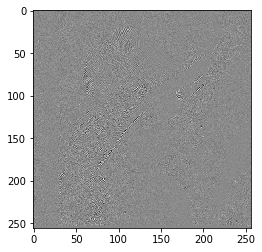

In [40]:
plt.imshow(H_dwt[0][2], cmap='gray')

In [41]:
type(H_dwt[1])

tuple

In [42]:
# Compute the pyramid
H_level = []
for l in range(0, N, 1):
    # Create a matrix of zeros to use it as the LL subband in each level of the LPT
    zero_LL = np.zeros((H_dwt[l][0].shape[0],H_dwt[l][0].shape[1]), 'float32')
    DWT_level = (zero_LL, H_dwt[l])
    LPT_level = pywt.idwt2(DWT_level, wavelet, mode='per')
    print(l, LPT_level.shape)
    H_level.append(LPT_level)

0 (512, 512)
1 (256, 256)
2 (128, 128)
3 (64, 64)
4 (32, 32)


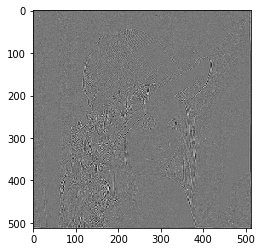

In [43]:
plt.imshow(H_level[0], cmap='gray')

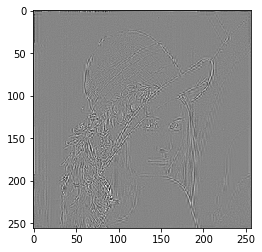

In [44]:
plt.imshow(H_level[1], cmap='gray')

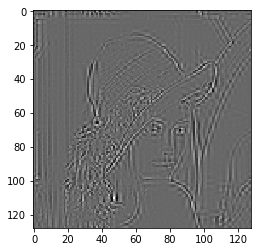

In [45]:
plt.imshow(H_level[2], cmap='gray')

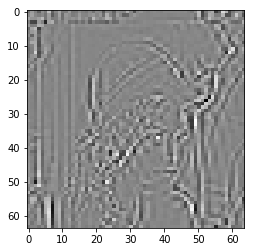

In [46]:
plt.imshow(H_level[3], cmap='gray')

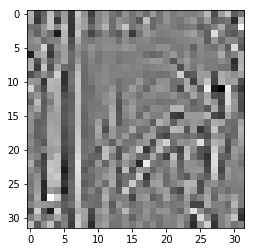

In [47]:
plt.imshow(H_level[4], cmap='gray')

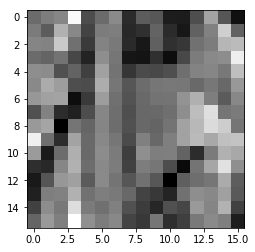

In [48]:
plt.imshow(LL, cmap='gray')

0
1
2
3
4


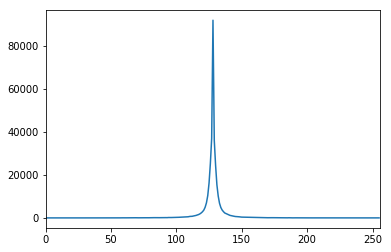

In [49]:
sum_hist = np.zeros([256,1], np.float64)
for n in range(N):
    print(n)
    hist = cv2.calcHist([H_level[n].astype('uint8')+128], [0], None, [256], [0, 256])
    sum_hist += hist
plt.plot(sum_hist)
plt.xlim([0,256])
plt.show()

In [50]:
entropy = st.entropy(sum_hist)[0]
print("Entropy of the pyramid =", entropy)

Entropy of the pyramid = 2.989972316695261


## LPT -> DWT

```
                                               +----+
                     +------------------------>| LL |---------------+
                     |                         +----+               |
                     |                                              v
+---------+        +-+--+----+                 +---------+        +----+----+                  +---------+ 
|         | DWT(Y) | LL | LH | iDWT     (2)    |         | DWT(H) | LL | lh | iDWT     (4)     |         |
|    Y    |------->+----+----+---------------->|    H    |------->+----+----+----------------->|    y    |
|         |  (1)   | HL | HH | (0, LH, HL, HH) |         |  (3)   | hl | hh | (LL, lh, hl, hh) |         |
+---------+        +----+----+                 +---------+        +----+----+                  +---------+
```

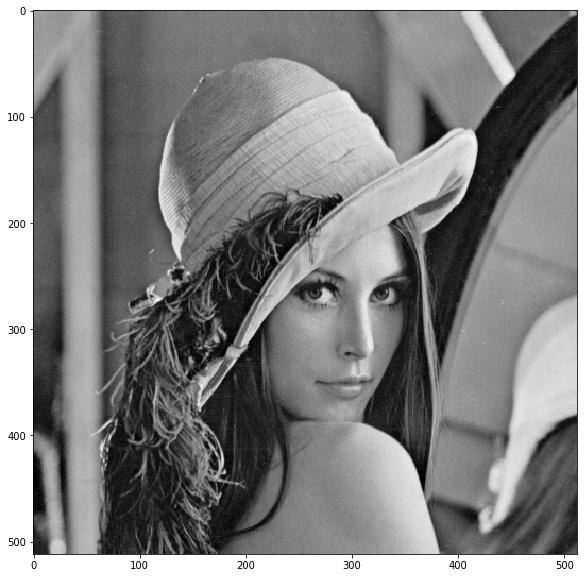

In [51]:
import urllib.request
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.stats as st

HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/lena.png')
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)
BGR = cv2.imdecode(arr,-1)
Y = cv2.cvtColor(BGR, cv2.COLOR_BGR2YCrCb)[:,:,0]
plt.figure(figsize = (10,10))
plt.imshow(Y, cmap="gray")

In [52]:
import pywt

# Sólo por ver los distintos filtros que hay disponibles
print (pywt.wavelist())

# Seleccionamos una en concreto 
wavelet = 'db9' # http://wavelets.pybytes.com/wavelet/db9/
#wavelet = 'haar'
#wavelet='bior3.5'

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'haar', 'mexh', 'morl', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'shan', 'sym2', 'sym3

In [53]:
# (1)
LL, (LH, HL, HH) = pywt.dwt2(Y, wavelet)

In [62]:
print(Y[10][10])

157


In [54]:
print(LL[10][10])

314.4875640918353


In [55]:
# (2)
zero_subband = np.zeros(HH.shape, np.float64)
H = pywt.idwt2((zero_subband, (LH, HL, HH)), wavelet)

In [60]:
print(H[10][10])

-1.5141088294123333


In [56]:
# (3)
should_be_zero, (lh, hl, hh) = pywt.dwt2(H, wavelet)

In [57]:
# (4)
y = pywt.idwt2((LL, (lh, hl, hh)), wavelet)

In [61]:
print(y[10][10])

156.9992111368004


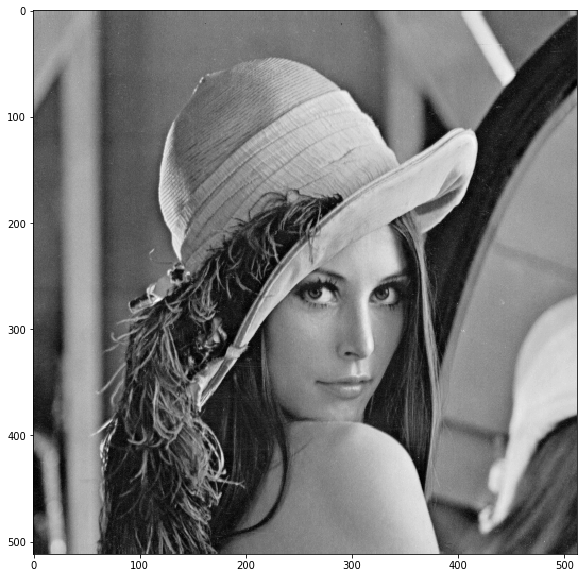

In [58]:
plt.figure(figsize = (10,10))
plt.imshow(y, cmap="gray")

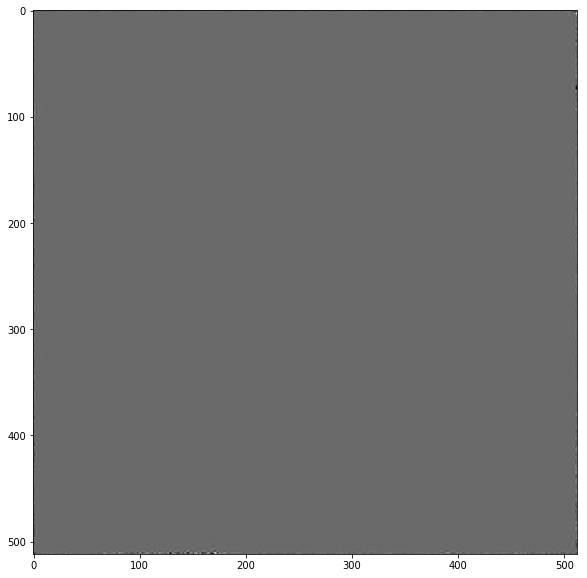

In [59]:
diff = Y-y
plt.figure(figsize = (10,10))
plt.imshow(diff, cmap="gray")

## Interesting links

* http://www.uni-mannheim.de/acm97/papers/liang/acm97.html
* http://research.microsoft.com/en-us/um/people/jinl/paper_2002/msri_jpeg.htm